In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
from sqlalchemy import func

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [18]:
# We can view all of the classes that automap found
tables = Base.classes.keys()

In [19]:
#Print all the tables and their columns
inspector = inspect(engine)
for i in tables:
    print(i)
    print("----")
    for j in inspector.get_columns(i):
        print(j['name'],j['type'])
    print("")

measurement
----
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
----
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
date_format = '%Y-%m-%d'
# Calculate the date 1 year ago from the last data point in the database
search_date = datetime.datetime.strptime(latest_date, date_format) - pd.DateOffset(years=1)
search_date = search_date.strftime(date_format)
# Perform a query to retrieve the data and precipitation scores
search = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > search_date).statement
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql(search,session.bind,index_col='date').sort_index()
df = df.dropna()

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

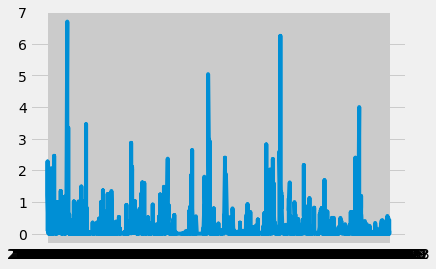

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
###CLEAN THIS GRAPH UP
plt.plot(df['prcp'])

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station.station.distinct()).count()
num_stations

9

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc())
most_active = station_count.first()[0]
station_count.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_temps = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active)
most_active_temps.all()

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_stmt = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > search_date).filter(Measurement.station == most_active).statement
temp_df = pd.read_sql(temp_stmt,session.bind,index_col='date').sort_index().dropna()


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

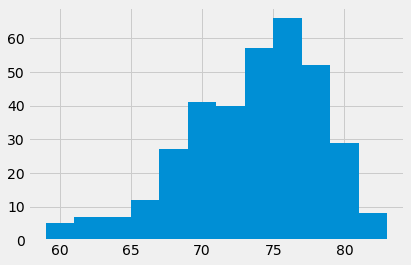

In [29]:
plt.hist(temp_df['tobs'],bins=12)

## Bonus Challenge Assignment

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tstats = calc_temps(search_date, latest_date)[0]
tstats

(58.0, 74.59058295964125, 87.0)

<BarContainer object of 1 artists>

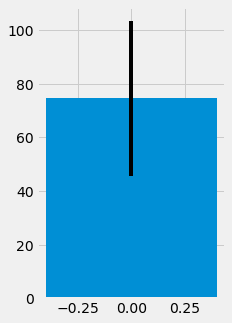

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x = [0]
y = [tstats[1]]
err = [tstats[2]-tstats[0]]
plt.figure(figsize=(3,5))
plt.bar(x,y,yerr=err)


In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
search_date
latest_date

query = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,func.sum(Measurement.prcp)).filter(Station.station == Measurement.station).group_by(Measurement.station).filter(Measurement.date > search_date).filter(Measurement.date < latest_date).order_by(func.sum(Measurement.prcp).desc()).all()
stations_df = pd.DataFrame(query, columns=['Station','Name','Lat','Long','Elevation','Precipication_sum'])
stations_df

,Station,Name,Lat,Long,Elevation,Precipication_sum
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,146.66
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,68.24
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,48.36
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,37.91
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,33.19
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,16.09
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,4.59


In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
normals = []
date = []
start  = datetime.datetime.strptime(search_date, date_format)
end = datetime.datetime.strptime(latest_date,date_format)
while start <= end:
    dform = datetime.datetime.strftime(start,'%m-%d')
    date.append(dform)
    normals.append(daily_normals(dform)[0])
    start = start + datetime.timedelta(days=1)

In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
norm_df = pd.DataFrame(normals,columns=['tmin','tavg','tmax'])
norm_df['date'] = date
norm_df.set_index('date')

,tmin,tavg,tmax
date,,,
08-23,67.0,76.692308,87.0
08-24,70.0,75.961538,84.0
08-25,69.0,76.960784,82.0
08-26,71.0,76.568627,84.0
08-27,68.0,76.283019,84.0
...,...,...,...
08-19,69.0,75.946429,85.0
08-20,68.0,76.452830,82.0
08-21,67.0,76.400000,83.0


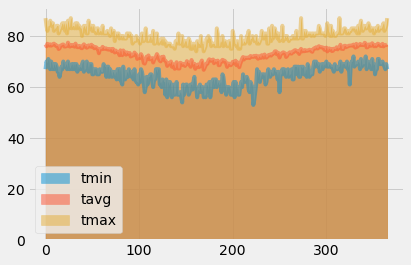

In [37]:
# Plot the daily normals as an area plot with `stacked=False`
norm_df.plot.area(stacked=False)

In [38]:
result = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation)
result.all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [39]:
session.close()

In [58]:
stat_list = []
for stat,name,lat,lng,elev in session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).all():
    stat_dict = {}
    stat_dict['station'] = stat
    stat_dict['name'] = name
    stat_dict['latitude'] = lat
    stat_dict['longitude'] = lng
    stat_dict['elevation'] = elev
    stat_list.append(stat_dict)

In [56]:
stat_list

[{'stat': 'USC00519397',
  'name': 'WAIKIKI 717.2, HI US',
  'lat': 21.2716,
  'lng': -157.8168,
  'elev': 3.0},
 {'stat': 'USC00513117',
  'name': 'KANEOHE 838.1, HI US',
  'lat': 21.4234,
  'lng': -157.8015,
  'elev': 14.6},
 {'stat': 'USC00514830',
  'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'lat': 21.5213,
  'lng': -157.8374,
  'elev': 7.0},
 {'stat': 'USC00517948',
  'name': 'PEARL CITY, HI US',
  'lat': 21.3934,
  'lng': -157.9751,
  'elev': 11.9},
 {'stat': 'USC00518838',
  'name': 'UPPER WAHIAWA 874.3, HI US',
  'lat': 21.4992,
  'lng': -158.0111,
  'elev': 306.6},
 {'stat': 'USC00519523',
  'name': 'WAIMANALO EXPERIMENTAL FARM, HI US',
  'lat': 21.33556,
  'lng': -157.71139,
  'elev': 19.5},
 {'stat': 'USC00519281',
  'name': 'WAIHEE 837.5, HI US',
  'lat': 21.45167,
  'lng': -157.84888999999998,
  'elev': 32.9},
 {'stat': 'USC00511918',
  'name': 'HONOLULU OBSERVATORY 702.2, HI US',
  'lat': 21.3152,
  'lng': -157.9992,
  'elev': 0.9},
 {'stat': 'USC00516128',
  'na